In [1]:
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#module
import analytics_helper.main_module as anal

## Изначально как библиотека выглядит у гугла и данные

In [ ]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(anal.KEY_FILE_LOCATION, anal.SCOPES)
analytics = build('analyticsreporting', 'v4', credentials=credentials)

In [3]:
type(analytics)

googleapiclient.discovery.Resource

In [4]:
reports = analytics.reports().batchGet(
      body={
        'reportRequests': [
        {
          'viewId': '{0}'.format(anal.VIEW_ID),
          'dateRanges': [{'startDate': '7daysAgo', 'endDate': 'yesterday'}],
          'metrics': [{'expression': 'ga:sessions'}],
          'dimensions': [{'name': 'ga:country'}]
        }]
      }
  ).execute()

In [5]:
report = reports['reports'][0]
report.keys()

dict_keys(['columnHeader', 'data'])

In [6]:
report['columnHeader']

{'dimensions': ['ga:country'],
 'metricHeader': {'metricHeaderEntries': [{'name': 'ga:sessions',
    'type': 'INTEGER'}]}}

In [9]:
report['data']

{'rows': [{'dimensions': ['(not set)'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Afghanistan'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Australia'], 'metrics': [{'values': ['5']}]},
  {'dimensions': ['Austria'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Belarus'], 'metrics': [{'values': ['43']}]},
  {'dimensions': ['Belgium'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Brazil'], 'metrics': [{'values': ['3']}]},
  {'dimensions': ['Bulgaria'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Canada'], 'metrics': [{'values': ['6']}]},
  {'dimensions': ['Croatia'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Cyprus'], 'metrics': [{'values': ['11']}]},
  {'dimensions': ['Czechia'], 'metrics': [{'values': ['2']}]},
  {'dimensions': ['Estonia'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['Finland'], 'metrics': [{'values': ['1']}]},
  {'dimensions': ['France'], 'metrics': [{'values': ['12']}]},
  {'dimensions': ['Germany'], 'metrics'

## Что можно сделать для удобства

In [10]:
df = anal.report_to_list_dfS(anal.body,anal.VIEW_ID,anal.anal_cred)[0]
df['ga:sessions'] = pd.to_numeric(df['ga:sessions'])
df.head()

,ga:country,ga:sessions
0,(not set),1
1,Afghanistan,1
2,Australia,5
3,Austria,1
4,Belarus,43


In [13]:
df['ga:sessions'].sum()

2092

## Попробуем воспроизвести график из GA

In [14]:
anal.body['reportRequests'][0]['dimensions'] = [{'name':'ga:date'}]
anal.body['reportRequests'][0]['metrics'] = [{'expression': 'ga:users'}]

df = anal.report_to_list_dfS(anal.body,anal.VIEW_ID,anal.anal_cred)[0]
df['ga:users'] = pd.to_numeric(df['ga:users'])
#df['ga:date'] = pd.to_datetime(df['ga:date'])

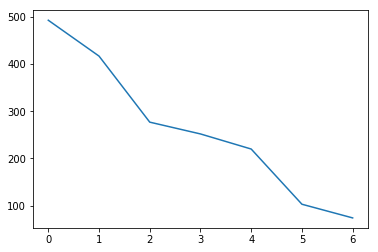

In [15]:
df['ga:users'].plot();

## Попробуем воспроизвести отчет из GA

In [16]:
anal.body['reportRequests'][0]['dimensions'] = [{'name':'ga:date'},{'name':'ga:source'},{'name':'ga:city'}]
anal.body['reportRequests'][0]['metrics'] = [{'expression': 'ga:sessions'}]

df = anal.report_to_list_dfS(anal.body,anal.VIEW_ID,anal.anal_cred)[0]

In [17]:
df.head()

,ga:date,ga:source,ga:city,ga:sessions
0,20180910,(direct),(not set),11
1,20180910,(direct),Ashburn,2
2,20180910,(direct),Ashgabat,1
3,20180910,(direct),Berlin,5
4,20180910,(direct),Bishkek,1


In [18]:
df.shape

(574, 4)